In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
raw_t = pd.read_csv('/content/GLB.Ts+dSST.csv')
raw_e = pd.read_excel('/content/API_EN.ATM.CO2E.PC_DS2_en_excel_v2_83980.xls')

In [5]:
raw_t.head()

#DJF = Dec-Feb
#MAM = Mar-May
#Positive anomaly = Obeserved temp was warmer than a baseline
#Negative anomaly = Cooler than baseline

,,,,,,,,,,,,,,,,,,Land-Ocean: Global Means
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
1880,-.29,-.18,-.11,-.20,-.12,-.23,-.21,-.09,-.16,-.23,-.20,-.23,-.19,***,***,-.14,-.18,-.20
1881,-.16,-.17,.04,.04,.02,-.20,-.07,-.03,-.14,-.21,-.22,-.11,-.10,-.11,-.18,.03,-.10,-.19
1882,.14,.15,.03,-.19,-.16,-.26,-.21,-.06,-.10,-.25,-.16,-.25,-.11,-.10,.06,-.10,-.17,-.17
1883,-.32,-.39,-.13,-.17,-.20,-.13,-.08,-.15,-.21,-.14,-.22,-.16,-.19,-.20,-.32,-.17,-.12,-.19


In [6]:
raw_e.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,NaN,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,NaN,NaN,NaN
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,NaN,NaN,NaN


In [ ]:
#Data wrangling -> Process of transforming and mapping data from one 'RAW' form to another format

In [7]:
date_range = pd.date_range(start='1/1/1880', end='1/03/2019', freq='M')
type(date_range[0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
t = pd.DataFrame(date_range, columns=['date'])

In [9]:
t['avg_anomaly_degC'] = None

In [10]:
t.set_index('date', inplace=True)
t.head()

,avg_anomaly_degC
date,
1880-01-31,None
1880-02-29,None
1880-03-31,None
1880-04-30,None
1880-05-31,None


In [44]:
has_index = raw_t.columns.has_duplicates
print(has_index)

False


In [60]:
raw_t = pd.read_csv('/content/GLB.Ts+dSST.csv', skiprows=1)

In [61]:
raw_t.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.29,-0.18,-0.11,-0.20,-0.12,-0.23,-0.21,-.09,-.16,-.23,-.20,-.23,-.19,***,***,-0.14,-.18,-.20
1,1881,-0.16,-0.17,0.04,0.04,0.02,-0.20,-0.07,-.03,-.14,-.21,-.22,-.11,-.10,-.11,-.18,0.03,-.10,-.19
2,1882,0.14,0.15,0.03,-0.19,-0.16,-0.26,-0.21,-.06,-.10,-.25,-.16,-.25,-.11,-.10,.06,-0.10,-.17,-.17
3,1883,-0.32,-0.39,-0.13,-0.17,-0.20,-0.13,-0.08,-.15,-.21,-.14,-.22,-.16,-.19,-.20,-.32,-0.17,-.12,-.19
4,1884,-0.16,-0.08,-0.37,-0.43,-0.37,-0.41,-0.35,-.26,-.27,-.24,-.30,-.29,-.29,-.28,-.13,-0.39,-.34,-.27


In [62]:
raw_t.shape

(140, 19)

In [63]:
raw_t.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

In [64]:
raw_t = raw_t.iloc[:, :13]
raw_t.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-0.29,-0.18,-0.11,-0.20,-0.12,-0.23,-0.21,-.09,-.16,-.23,-.20,-.23
1,1881,-0.16,-0.17,0.04,0.04,0.02,-0.20,-0.07,-.03,-.14,-.21,-.22,-.11
2,1882,0.14,0.15,0.03,-0.19,-0.16,-0.26,-0.21,-.06,-.10,-.25,-.16,-.25
3,1883,-0.32,-0.39,-0.13,-0.17,-0.20,-0.13,-0.08,-.15,-.21,-.14,-.22,-.16
4,1884,-0.16,-0.08,-0.37,-0.43,-0.37,-0.41,-0.35,-.26,-.27,-.24,-.30,-.29


In [69]:
import calendar
from datetime import datetime

In [70]:
def populate_df_with_anomalies_from_row(row):
  year = row['Year']

  monthly_anomalies = row.iloc[1:]

  months = monthly_anomalies.index
  for month in monthly_anomalies.index:
    last_day = calendar.monthrange(year,datetime.strptime(month, '%b').month)[1]
    date_index = datetime.strptime(f'{year} {month} {last_day}', '%Y %b %d')

    t.loc[date_index] = monthly_anomalies[month]

_ = raw_t.apply(lambda row: populate_df_with_anomalies_from_row(row), axis=1)

t.head()

,avg_anomaly_degC
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.2
1880-05-31,-0.12


In [71]:
def clean_value(raw_value):
  try:
    return float(raw_value)
  except:
    return np.NaN



In [72]:
t['avg_anomaly_degC'] = t['avg_anomaly_degC'].apply(lambda raw_value:clean_value(raw_value))

In [73]:
t.fillna(method='ffill',inplace=True)
t.head()

,avg_anomaly_degC
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.20
1880-05-31,-0.12


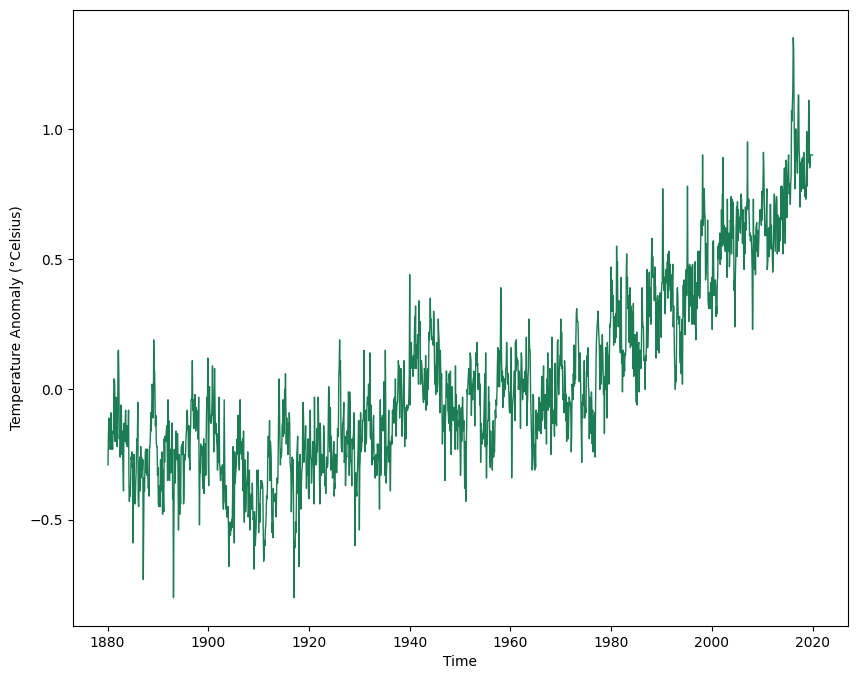

In [74]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(t, color='#1C7C54', linewidth=1.0)

In [75]:
t.resample('A').mean().head()

,avg_anomaly_degC
date,
1880-12-31,-0.187500
1881-12-31,-0.100833
1882-12-31,-0.110000
1883-12-31,-0.191667
1884-12-31,-0.294167


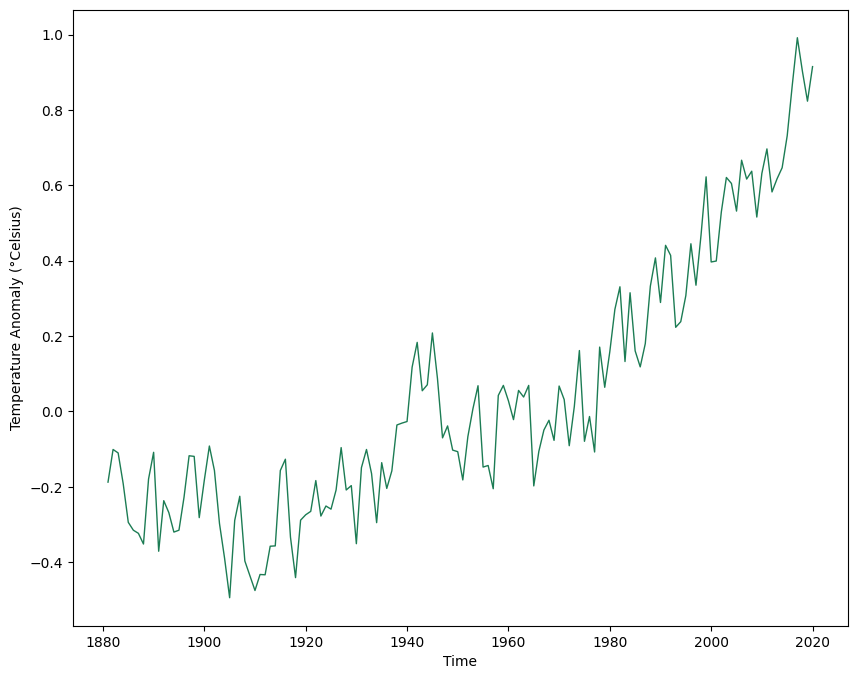

In [76]:
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(t.resample('A').mean(), color='#1C7C54', linewidth=1.0)

In [90]:
raw_e_world = raw_e[raw_e['Country Name'] == 'World'].loc[:, '1960':'2018']

In [91]:
raw_e_world.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.391451,4.604869,4.689469,4.685377,4.719666,4.682408,4.601684,4.558579,4.578381,4.642145


In [92]:
def populate_df(row):
    index = str(row['date'].year)
    value = raw_e_world.loc[index]
    return value

In [93]:
raw_e_world = raw_e_world.T
raw_e_world.columns = ['value']

In [101]:
date_rng = pd.date_range(start='31/12/1960', end='31/12/2018', freq='y')
e = pd.DataFrame(date_rng, columns=['date'])
v = e.apply(lambda row: populate_df(row), axis=1)
e['Global CO2 Emissions per Capita'] = v
e.set_index('date', inplace=True)
e.tail()

,Global CO2 Emissions per Capita
date,
2014-12-31,4.682408
2015-12-31,4.601684
2016-12-31,4.558579
2017-12-31,4.578381
2018-12-31,4.642145


In [102]:
e[e.index.year>2011]

,Global CO2 Emissions per Capita
date,
2012-12-31,4.685377
2013-12-31,4.719666
2014-12-31,4.682408
2015-12-31,4.601684
2016-12-31,4.558579
2017-12-31,4.578381
2018-12-31,4.642145


In [107]:
e.fillna(method='ffill', inplace=True)

In [111]:
e['Global CO2 Emissions per Capita'].isnull().sum()

30

In [114]:
e.fillna(e.mean(), inplace=True)

In [115]:
e.head()

,Global CO2 Emissions per Capita
date,
1960-12-31,4.251286
1961-12-31,4.251286
1962-12-31,4.251286
1963-12-31,4.251286
1964-12-31,4.251286


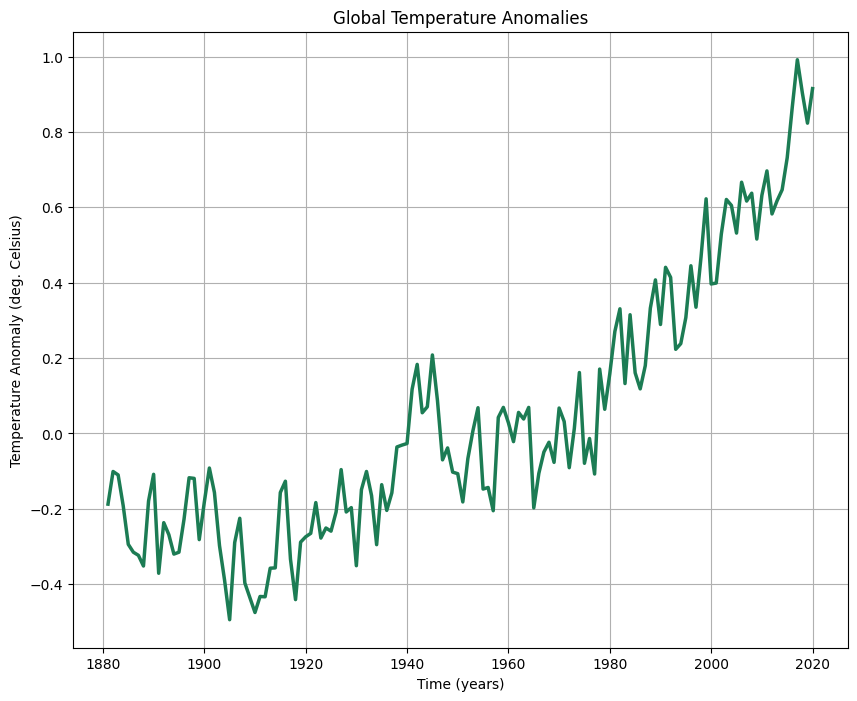

In [116]:
import matplotlib.pyplot as plt

t_resampled = t.resample('A').mean()

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(t_resampled, color='#1C7C54', linewidth=2.5)

ax.set(xlabel='Time (years)', ylabel='Temperature Anomaly (deg. Celsius)',title='Global Temperature Anomalies')
ax.grid()

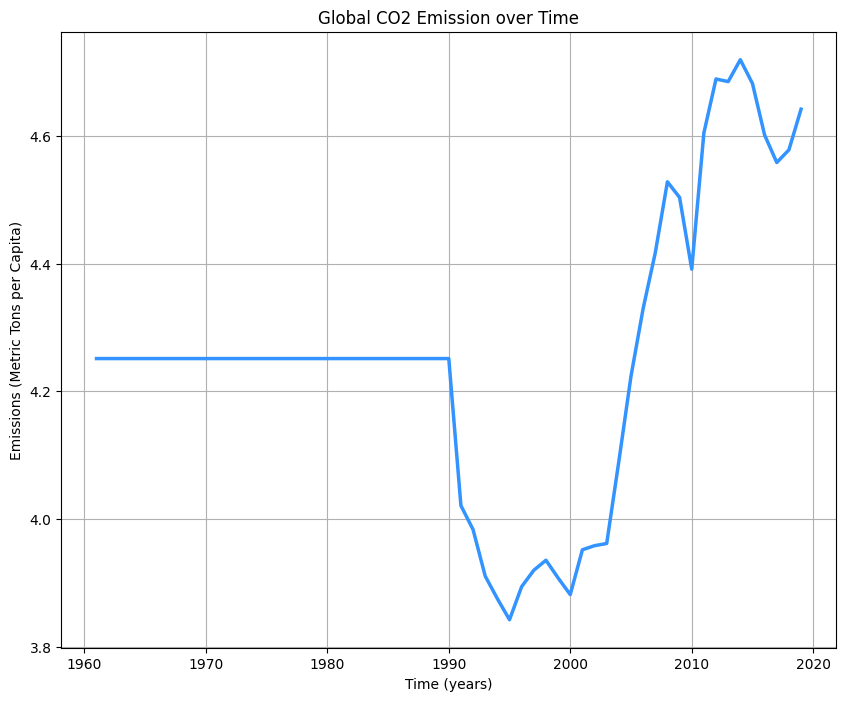

In [117]:
fig, ax = plt.subplots(figsize=(10,8))


ax.plot(e, color='#3393FF', linewidth=2.5)


ax.set(xlabel='Time (years)', ylabel='Emissions (Metric Tons per Capita)',
       title='Global CO2 Emission over Time')

ax.grid()

In [ ]:
#Granger casuality is used to determine whether one time series will be useful in forecasting another.

In [ ]:
#Dynamic Time wrapping
'''To measure the similarity between time series
'''

In [129]:
from prophet import Prophet

In [126]:
t_prophet = pd.DataFrame()
t_prophet['ds'] = t.index
t_prophet['y'] = t['avg_anomaly_degC'].values

In [130]:
model = Prophet()
model.fit(t_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaqd2xm4s/6xleeum4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaqd2xm4s/v7s64u3f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46646', 'data', 'file=/tmp/tmpaqd2xm4s/6xleeum4.json', 'init=/tmp/tmpaqd2xm4s/v7s64u3f.json', 'output', 'file=/tmp/tmpaqd2xm4s/prophet_modelztoijpxb/prophet_model-20240422140905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [132]:
future = model.make_future_dataframe(freq='m', periods=100*12)
forecast = model.predict(future)

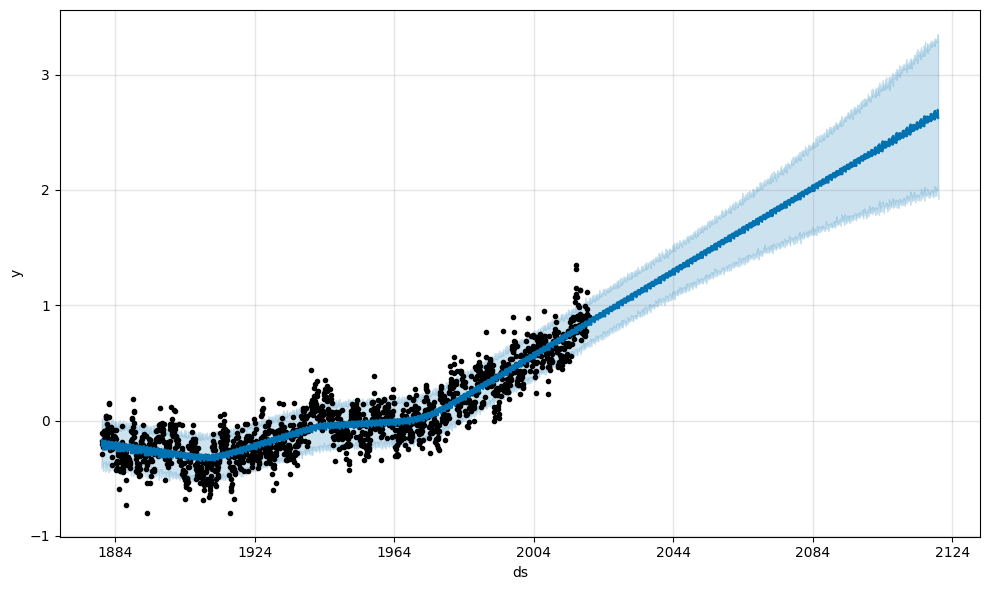

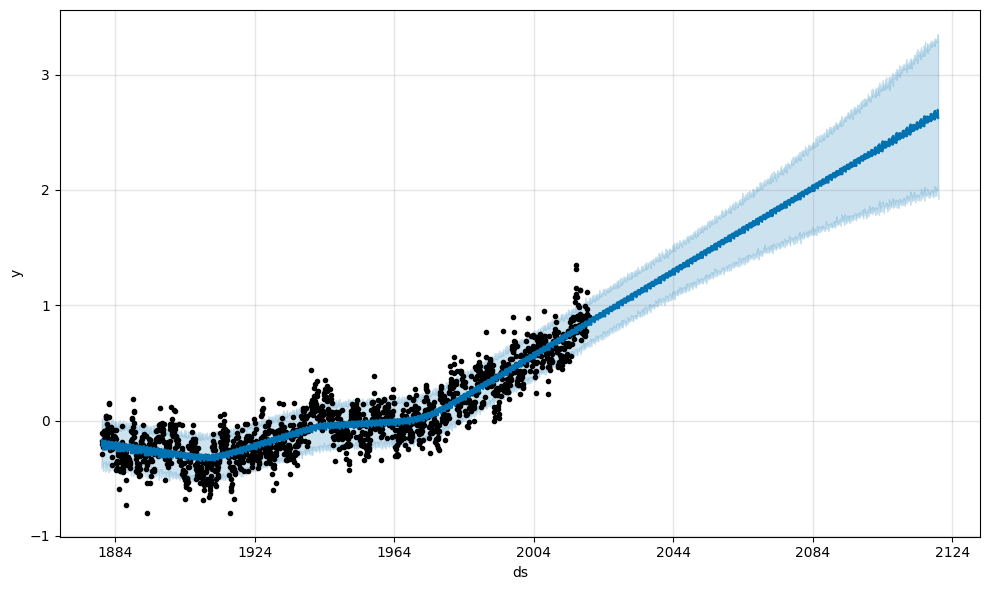

In [133]:
model.plot(forecast)

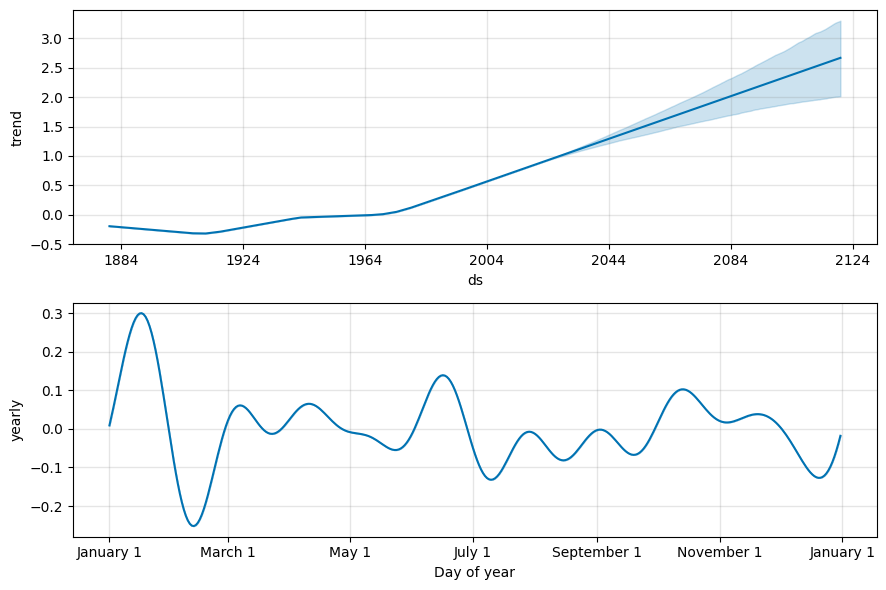

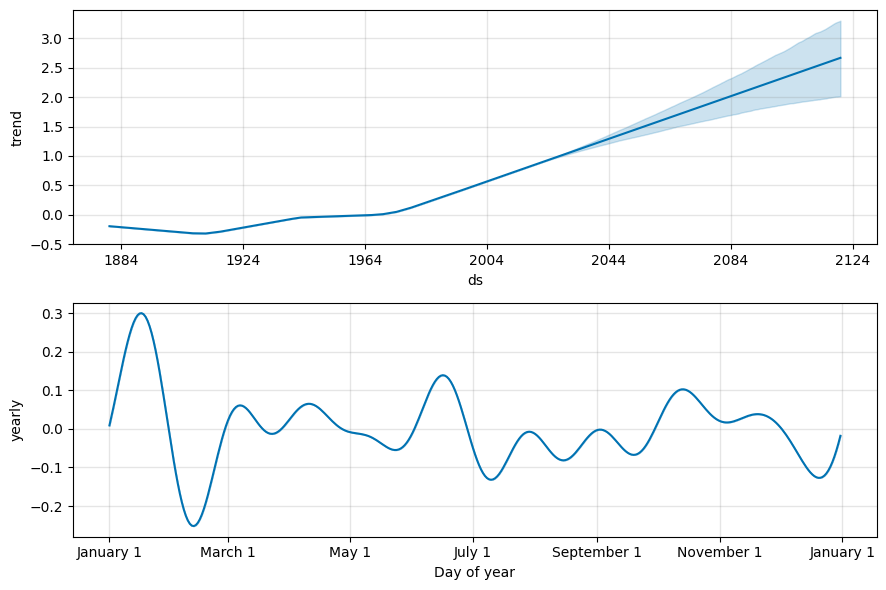

In [134]:
model.plot_components(forecast)